# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
#%pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [ ]:
#*****************************************************************
#THIS IS TEST CODE. REMEMBER TO DELETED THIS ONE BEFORE SUBMITTING
#*****************************************************************

# Empty list for holding the latitude and longitude combinations
#lat_lngs = []

# Empty list for holding the cities names
#cities = []

# Range of latitudes and longitudes
#lat_range = (-90, 90)
#lng_range = (-180, 180)

# Generate random lat and lng combinations until 50 unique cities are found
#while len(cities) < 50:
    # Generate a random latitude and longitude
    #lat = np.random.uniform(lat_range[0], lat_range[1])
    #lng = np.random.uniform(lng_range[0], lng_range[1])
    
    # Find the nearest city based on the generated coordinates
    #city = citipy.nearest_city(lat, lng).city_name
    
    # If the city is unique, add it to the cities list
    #if city not in cities:
       # cities.append(city)
        #lat_lngs.append((lat, lng))

# Print the city count to confirm the limit
#print(f"Number of cities in the list: {len(cities)}")


In [6]:
#***************************************************************
#THIS IS THE MAIN CODE. REMEMBER TO USE THIS ONE WHEN SUBMITTING 
#***************************************************************

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
#while len(cities) <50:
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}&units=metric"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

         # Convert the date from UNIX UTC to year-month-day format
        city_date = datetime.datetime.utcfromtimestamp(city_date).strftime("%Y-%m-%d")

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tazacorte
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | haiku-pauwela
Processing Record 5 of Set 1 | vorgashor
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | petropavlovsk-kamchatsky
Processing Record 8 of Set 1 | san ignacio de velasco
Processing Record 9 of Set 1 | richards bay
Processing Record 10 of Set 1 | invercargill
Processing Record 11 of Set 1 | novokazalinsk
City not found. Skipping...
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | amahai
Processing Record 14 of Set 1 | whitehorse
Processing Record 15 of Set 1 | calvi
Processing Record 16 of Set 1 | lubango
Processing Record 17 of Set 1 | kununurra
Processing Record 18 of Set 1 | anastacio
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | papatowai
P

In [8]:
city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
response = requests.get(city_url)
print(response.json())


{'coord': {'lon': 71.5113, 'lat': 56.0055}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 280.62, 'feels_like': 278.32, 'temp_min': 280.62, 'temp_max': 280.62, 'pressure': 1025, 'humidity': 87, 'sea_level': 1025, 'grnd_level': 1012}, 'visibility': 10000, 'wind': {'speed': 3.49, 'deg': 49, 'gust': 6.88}, 'clouds': {'all': 27}, 'dt': 1685056861, 'sys': {'country': 'RU', 'sunrise': 1685054650, 'sunset': 1685115482}, 'timezone': 21600, 'id': 1501690, 'name': 'Krutinka', 'cod': 200}


In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tazacorte,28.6290,-17.9293,19.54,80,100,2.57,ES,2023-05-25
1,ushuaia,-54.8000,-68.3000,0.81,80,20,3.60,AR,2023-05-25
2,iqaluit,63.7506,-68.5145,1.85,74,75,4.47,CA,2023-05-25
3,haiku-pauwela,20.9219,-156.3051,26.20,69,75,8.23,US,2023-05-25
4,vorgashor,67.5833,63.9500,13.26,76,96,4.19,RU,2023-05-25


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazacorte,28.6290,-17.9293,19.54,80,100,2.57,ES,2023-05-25
1,ushuaia,-54.8000,-68.3000,0.81,80,20,3.60,AR,2023-05-25
2,iqaluit,63.7506,-68.5145,1.85,74,75,4.47,CA,2023-05-25
3,haiku-pauwela,20.9219,-156.3051,26.20,69,75,8.23,US,2023-05-25
4,vorgashor,67.5833,63.9500,13.26,76,96,4.19,RU,2023-05-25


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

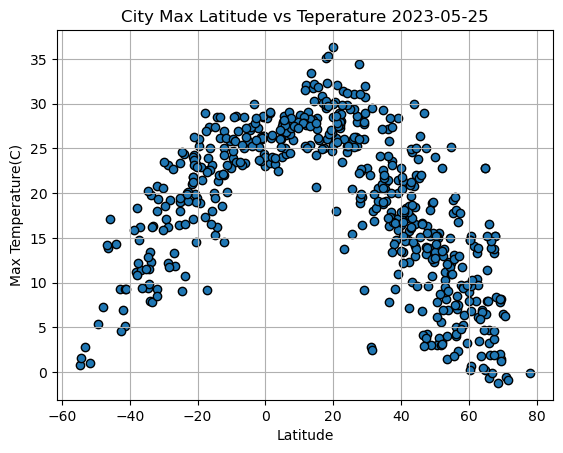

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs Teperature {city_date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

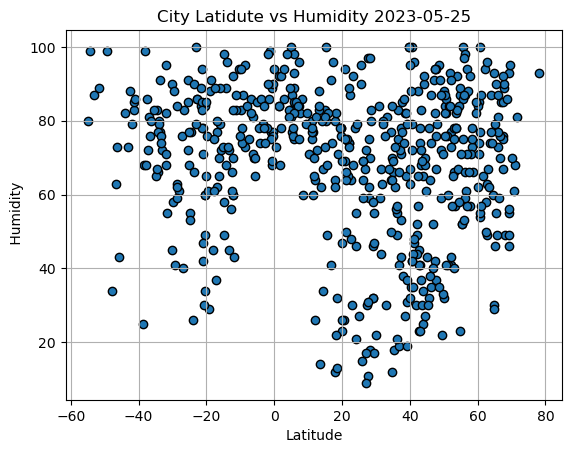

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latidute vs Humidity {city_date}")
plt.xlabel("Latitude")
plt.ylabel(" Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

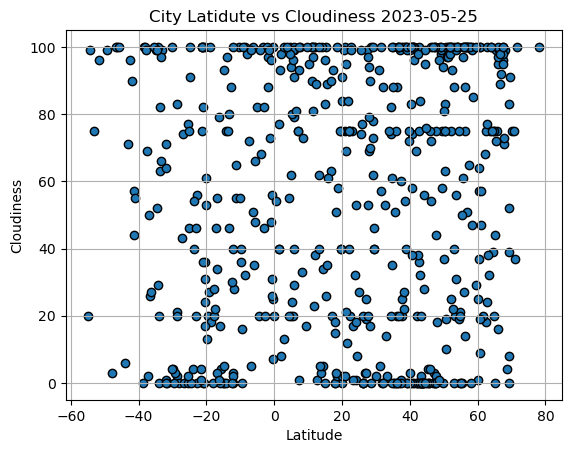

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", edgecolor="black")

# Incorporate the other graph properties
plt.title(f"City Latidute vs Cloudiness {city_date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

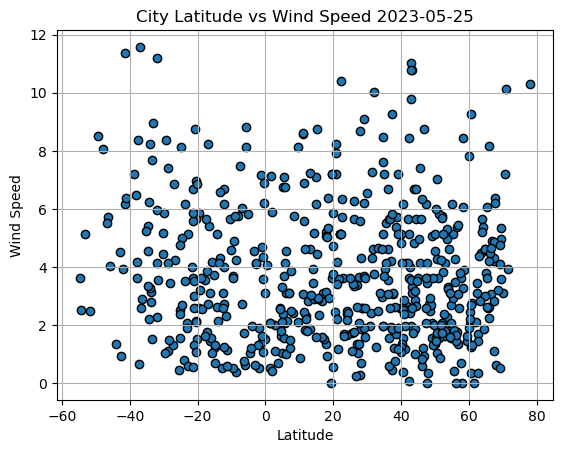

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker= "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed {city_date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create linear regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, hemisphere):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

    # Calculate the regression line
    regression_line = x_values * slope + intercept

    # Create scatter plot
    plt.scatter(x_values, y_values, marker="o", edgecolor="black")
    plt.plot(x_values, regression_line, color="red")

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} Hemisphere: {y_label} vs. {x_label}")

    # Add regression equation and r-value to the plot
    equation = f"y = {slope:.2f}x + {intercept:.2f}"
    r_value = f"R-value = {rvalue:.2f}"
    plt.annotate(equation, (x_values.min(), y_values.min()), fontsize=12, color="red")
    plt.annotate(r_value, (x_values.min(), y_values.min() + (y_values.max() - y_values.min()) * 0.8), fontsize=12, color="red")

    # Show plot
    plt.show()


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

#Display Sample Data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tazacorte,28.6290,-17.9293,19.54,80,100,2.57,ES,2023-05-25
2,iqaluit,63.7506,-68.5145,1.85,74,75,4.47,CA,2023-05-25
3,haiku-pauwela,20.9219,-156.3051,26.20,69,75,8.23,US,2023-05-25
4,vorgashor,67.5833,63.9500,13.26,76,96,4.19,RU,2023-05-25
6,petropavlovsk-kamchatsky,53.0452,158.6483,10.33,66,40,2.00,RU,2023-05-25


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0] 

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,0.81,80,20,3.60,AR,2023-05-25
5,adamstown,-25.0660,-130.1015,23.41,68,46,2.51,PN,2023-05-25
7,san ignacio de velasco,-16.3667,-60.9500,25.10,70,79,1.44,BO,2023-05-25
8,richards bay,-28.7830,32.0377,23.13,63,2,7.42,ZA,2023-05-25
9,invercargill,-46.4000,168.3500,13.82,73,100,5.73,NZ,2023-05-25


###  Temperature vs. Latitude Linear Regression Plot

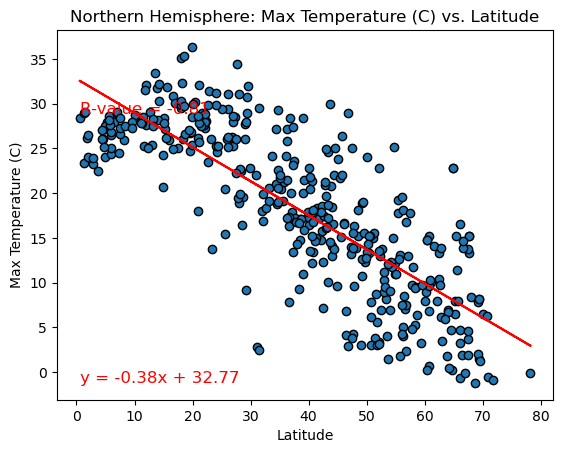

In [20]:
# Linear regression on Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature (C)", "Northern")

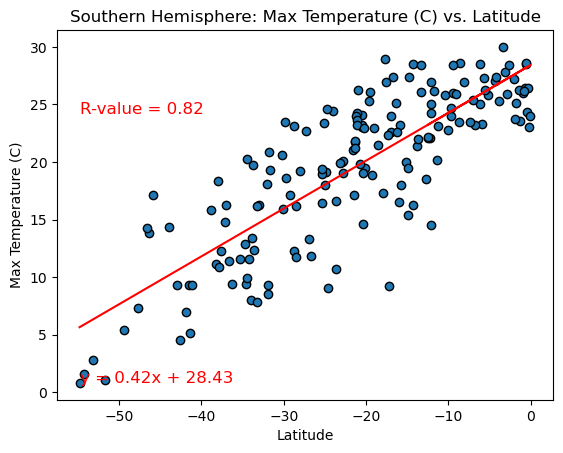

In [21]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (C)", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

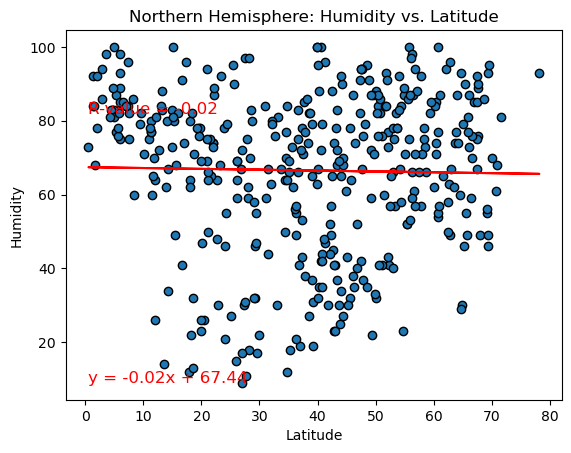

In [22]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", "Northern")

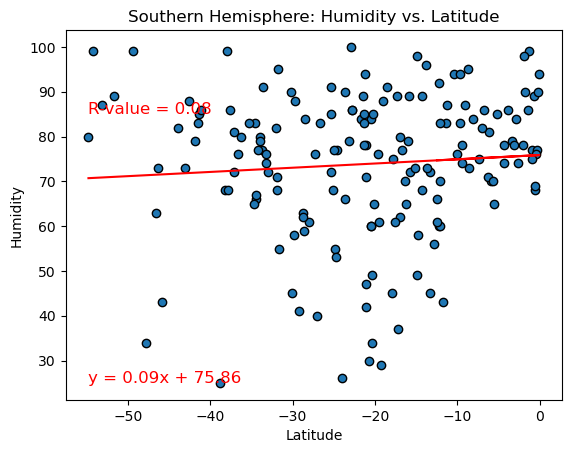

In [23]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

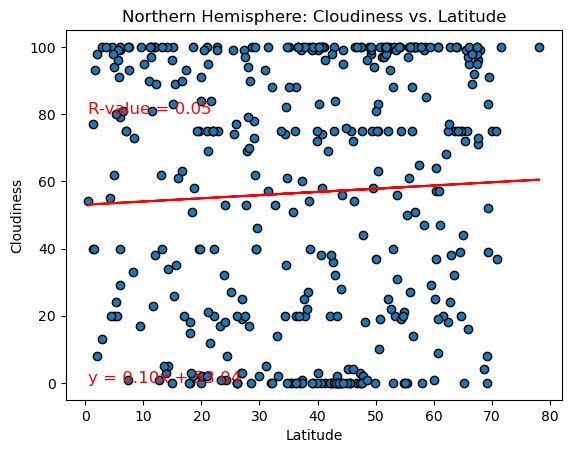

In [24]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Northern")

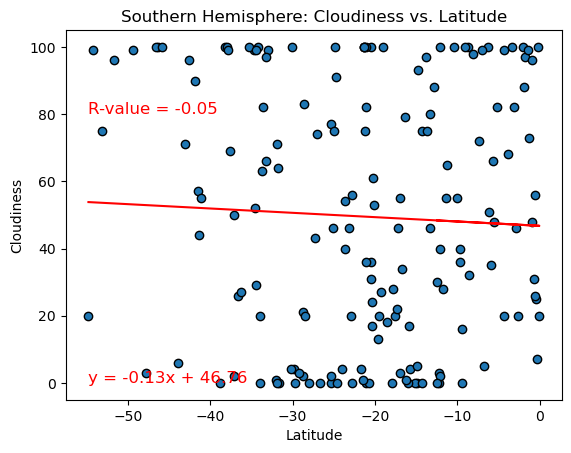

In [25]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

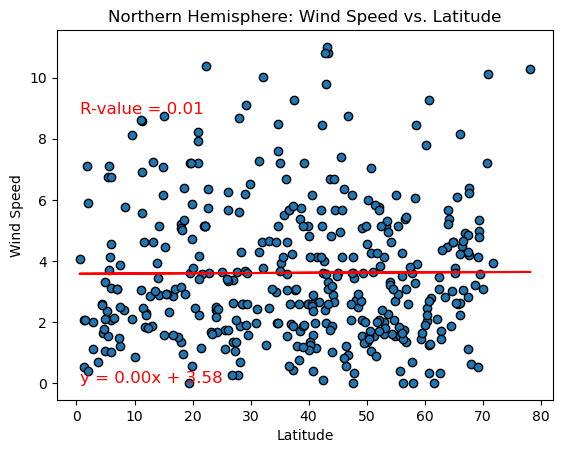

In [26]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Northern")

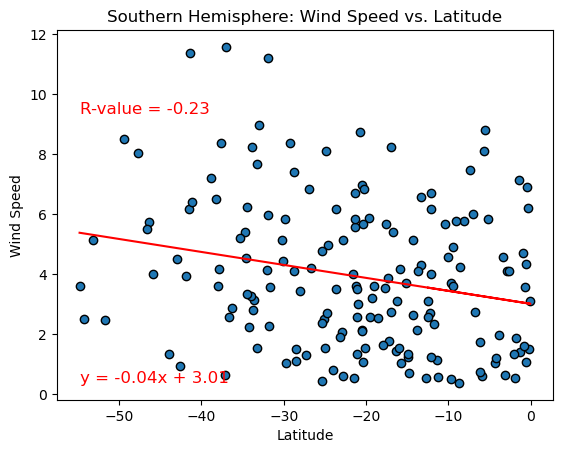

In [27]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", "Southern")

**Discussion about the linear relationship:** YOUR RESPONSE HERE